<a href="https://colab.research.google.com/github/trankhanhduy20146093/TRI_TUE_NHAN_TAO/blob/main/Baitap_tuan_9_CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar100
from keras.models import Sequential
import matplotlib.pyplot as plt

(x_train, y_train) ,(x_test, y_test) = cifar100.load_data()

print("x_train: {}x{}x{}".format(x_train.shape[0], x_train.shape[1], x_train.shape[2]))

x_train: 50000x32x32


In [2]:
print("x_test: {}x{}x{}".format(x_test.shape[0], x_test.shape[1], x_test.shape[2]))

x_test: 10000x32x32


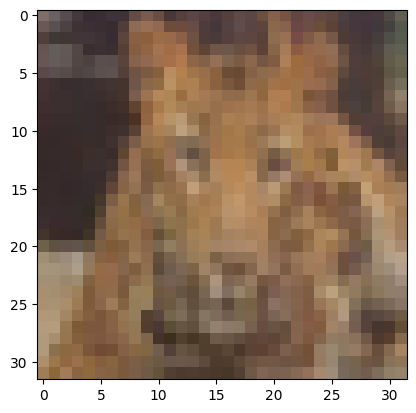

In [3]:
hinh = x_train[5000]
plt.imshow(hinh,cmap=plt.cm.binary)
plt.show()

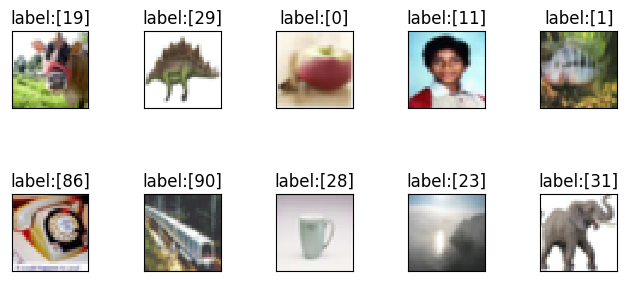

In [4]:
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title("label:{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

In [5]:
from keras.layers import Dense
from keras import models

model=Sequential()
model.add(Dense(512,activation ='relu',input_shape = (32*32*3,))) #do anh kich thuoc 32x32
model.add(Dense(512,activation ='relu')) 
model.add(Dense(100,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 100)               51300     
                                                                 
Total params: 1,887,332
Trainable params: 1,887,332
Non-trainable params: 0
_________________________________________________________________


In [6]:
x_train = x_train.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255

x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255


In [7]:
#Converts a class vector (integers) to binary class matrix.
from keras.utils import to_categorical
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)


In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=128)
test_loss,test_acc=model.evaluate(x_test,y_test)

print('test_acc:',test_acc)
print('test_loss',test_loss)

Epoch 1/10
391/391 [==============================] - 21s 46ms/step - loss: 4.0389 - accuracy: 0.0869
Epoch 2/10
391/391 [==============================] - 20s 50ms/step - loss: 3.6344 - accuracy: 0.1481
Epoch 3/10
391/391 [==============================] - 19s 48ms/step - loss: 3.4655 - accuracy: 0.1788
Epoch 4/10
391/391 [==============================] - 19s 49ms/step - loss: 3.3475 - accuracy: 0.2005
Epoch 5/10
391/391 [==============================] - 18s 46ms/step - loss: 3.2415 - accuracy: 0.2188
Epoch 6/10
391/391 [==============================] - 19s 48ms/step - loss: 3.1552 - accuracy: 0.2321
Epoch 7/10
391/391 [==============================] - 18s 45ms/step - loss: 3.0777 - accuracy: 0.2474
Epoch 8/10
391/391 [==============================] - 18s 45ms/step - loss: 3.0074 - accuracy: 0.2588
Epoch 9/10
391/391 [==============================] - 19s 48ms/step - loss: 2.9490 - accuracy: 0.2707
Epoch 10/10
313/313 [==============================] - 2s 6ms/step - loss: 3.2881 

1/1 [==============================] - 0s 34ms/step
Predicted label is [0]


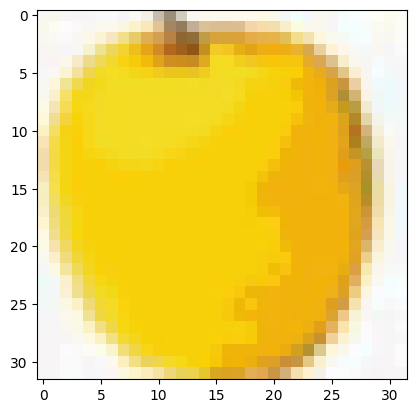

In [10]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

#load anh len va de o kich thuoc 32x32
img = load_img('apple.jpg', target_size = (32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 32*32*3)
img = img.astype('float32')
img = img / 255

predicted_label = np.argmax(model.predict(img),axis = -1)

print("Predicted label is {}".format(predicted_label))